In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

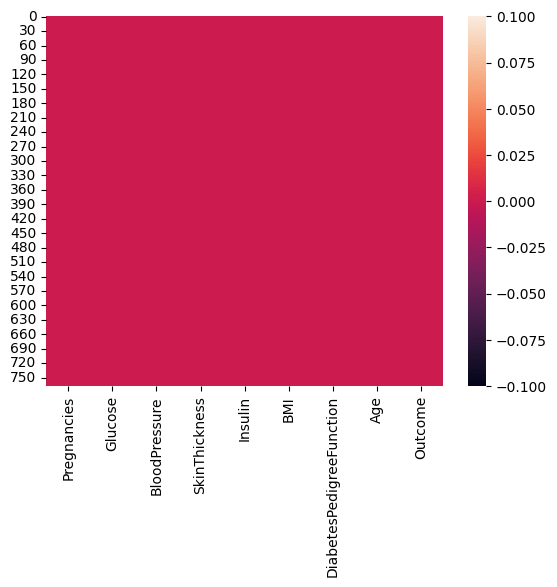

In [3]:
sns.heatmap(data.isnull())

In [4]:
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

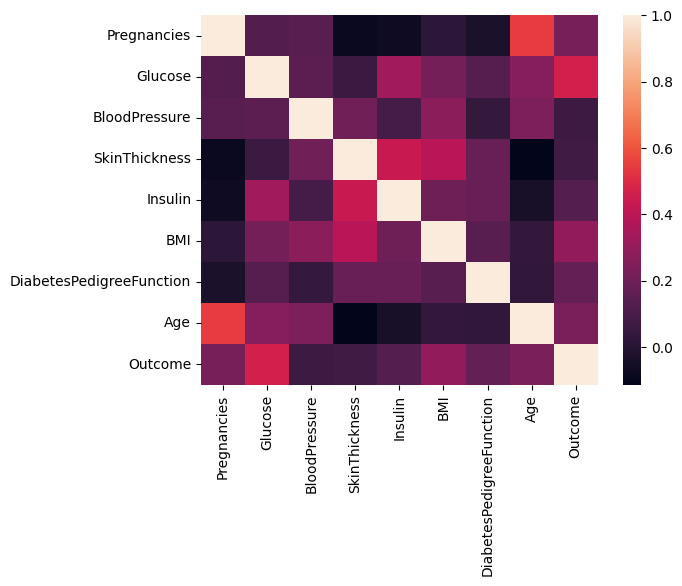

In [5]:
sns.heatmap(correlation)

In [7]:
X = data.drop("outcome", axis=1)
Y = data['outcome']
X

KeyError: "['outcome'] not found in axis"

In [8]:
X = data.drop("Outcome", axis=1)
Y = data['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
574,1,143,86,30,330,30.1,0.892,23
580,0,151,90,46,0,42.1,0.371,21
193,11,135,0,0,0,52.3,0.578,40
268,0,102,52,0,0,25.1,0.078,21
562,1,87,68,34,77,37.6,0.401,24
...,...,...,...,...,...,...,...,...
512,9,91,68,0,0,24.2,0.200,58
111,8,155,62,26,495,34.0,0.543,46
291,0,107,62,30,74,36.6,0.757,25
461,1,71,62,0,0,21.8,0.416,26


In [9]:
model = LogisticRegression()
model.fit(X_train, Y_train)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
predictions = model.predict(X_test)

In [11]:
print(predictions)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1]


In [14]:
accuracy = accuracy_score(predictions, Y_test)

In [15]:
print(accuracy)

0.7662337662337663
